### Bank Customer Satisfaction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPool1D,BatchNormalization,Dropout,Flatten,Dense

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
data.shape

(76020, 371)

In [7]:
X = data.drop(labels=['ID','TARGET'],axis=1)

In [8]:
X.shape

(76020, 369)

In [9]:
y = data['TARGET']

In [10]:
y.shape

(76020,)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0,stratify=y)

In [12]:
X_train.shape,X_test.shape

((60816, 369), (15204, 369))

### Remove Constant,Quasi_constant & Duplicate Features

In [13]:
filter = VarianceThreshold(0.01)
X_train = filter.fit_transform(X_train)
X_test = filter.transform(X_test)

In [14]:
X_train

array([[2.00000000e+00, 2.60000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.17310979e+05],
       [2.00000000e+00, 2.30000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.54723400e+04],
       [2.00000000e+00, 2.30000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.17769240e+05],
       ...,
       [2.00000000e+00, 4.10000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.54040100e+04],
       [2.00000000e+00, 3.10000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.17310979e+05],
       [2.00000000e+00, 3.70000000e+01, 1.26000000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 1.17310979e+05]])

In [15]:
X_train.shape,X_test.shape

((60816, 273), (15204, 273))

In [16]:
X_train_T = X_train.T
X_test_T = X_test.T

In [17]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [18]:
X_train_T.duplicated().sum()

17

In [19]:
duplicate_features= X_train_T.duplicated()
duplicate_features

0      False
1      False
2      False
3      False
4      False
       ...  
268    False
269    False
270    False
271    False
272    False
Length: 273, dtype: bool

In [20]:
features_to_keep = [not index for index in duplicate_features]

In [21]:
X_train = X_train_T[features_to_keep].T
X_test = X_test_T[features_to_keep].T

In [22]:
X_train.shape,X_test.shape

((60816, 256), (15204, 256))

### Standardization Process:

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train

array([[ 3.80478472e-02, -5.56029626e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -1.83006062e-01],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  1.17499225e+00],
       ...,
       [ 3.80478472e-02,  5.99731758e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -2.41865113e-01],
       [ 3.80478472e-02, -1.70775831e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02,  2.91528722e-01,  7.65192053e+00, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03]])

In [25]:
X_train.shape,X_test.shape

((60816, 256), (15204, 256))

In [26]:
X_train = X_train.reshape(60816, 256,1)
X_test = X_test.reshape(15204, 256,1)

In [27]:
type(y_train)

pandas.core.series.Series

In [28]:
y_train = y_train.to_numpy()

#### Build CNN Model 

In [29]:
model = Sequential()

model.add(Conv1D(filters=32,kernel_size=(3),activation='relu',input_shape = (256,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.30))


model.add(Conv1D(filters=64,kernel_size=(3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.50))

model.add(Conv1D(filters=128,kernel_size=(3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.50))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.50))

model.add(Dense(1,activation='sigmoid'))


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 254, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 127, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 125, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 64)            0

### Compile Our Model

In [31]:
from tensorflow.keras.optimizers import Adam

In [33]:
model.compile(optimizer=(Adam(lr=0.00005)),loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
history = model.fit(X_train,y_train,epochs=10,verbose=1,validation_data=(X_test,y_test))
print(str(history))

Train on 60816 samples, validate on 15204 samples
Epoch 1/10
60816/60816 [==============================] - 212s 3ms/sample - loss: 0.2278 - accuracy: 0.9510 - val_loss: 0.1760 - val_accuracy: 0.9592
Epoch 2/10
60816/60816 [==============================] - 200s 3ms/sample - loss: 0.1746 - accuracy: 0.9591 - val_loss: 0.1750 - val_accuracy: 0.9605
Epoch 3/10
60816/60816 [==============================] - 213s 4ms/sample - loss: 0.1678 - accuracy: 0.9601 - val_loss: 0.1723 - val_accuracy: 0.9604
Epoch 4/10
60816/60816 [==============================] - 226s 4ms/sample - loss: 0.1646 - accuracy: 0.9603 - val_loss: 0.1677 - val_accuracy: 0.9604
Epoch 5/10
60816/60816 [==============================] - 229s 4ms/sample - loss: 0.1626 - accuracy: 0.9603 - val_loss: 0.1621 - val_accuracy: 0.9604
Epoch 6/10
60816/60816 [==============================] - 224s 4ms/sample - loss: 0.1605 - accuracy: 0.9604 - val_loss: 0.1604 - val_accuracy: 0.9604
Epoch 7/10
60816/60816 [==========================

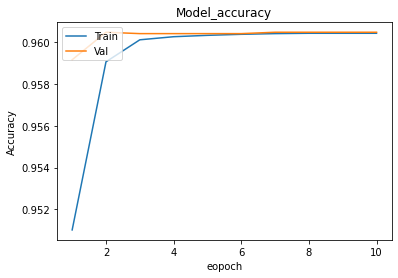

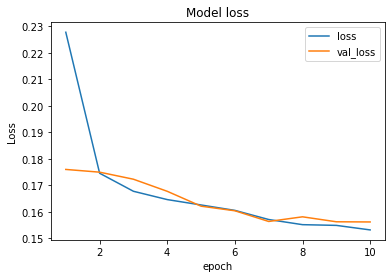

In [35]:
# ploting training and validation accuracy
epochs =10
epochs = range(1,epochs+1)
plt.plot(epochs,history.history['accuracy'])
plt.plot(epochs,history.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('eopoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

# ploting training and validation loss
plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['loss','val_loss'],loc='upper right')

##### Here we get accuracy of 96% 